In [5]:
import pandas as pd
#from sklearn.datasets import load_boston
from keras.layers import Dense,Dropout,Activation,Input
from keras.models import Sequential,Model
from numpy import *
from keras import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error

#神经网络模型构建
def make_model(InputSize):
    model=Sequential()
    model.add(Dense(units=100,activation='relu',input_shape=(InputSize,)))
    model.add(Dropout(0.05))
    model.add(Dense(units=80,activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(units=1,activation=None))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=[metrics.mae])
    print(model.summary())
    return model

'''
R^2

0.728964325027

数据归一化-->

0.748450522912

添加dropout层-->

best
0.75180572067

'''

'\nR^2\n\n0.728964325027\n\n数据归一化-->\n\n0.748450522912\n\n添加dropout层-->\n\nbest\n0.75180572067\n\n'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

new_training_data = pd.read_csv("./new_training_data.csv")
train_data = pd.read_csv("./30_Training Dataset_V2/training_data.csv", encoding="utf-8")
public_dataset = pd.read_csv("./30_Public Dataset_Public Sumission Template_v2/public_dataset.csv")
private_dataset = pd.read_csv('./30_Private Dataset _Private and Publict Submission Template_v2/private_dataset.csv')
new_public_data = pd.read_csv("./new_public_data.csv")
new_private_data = pd.read_csv("./new_private_data.csv")

In [36]:
if __name__ == '__main__':

    #划分训练集和测试集的输入输出 
    #df_train=pd.read_csv('train_data.csv')
    #df_test=pd.read_csv('test_data.csv')
    #X_train = df_train.drop('average',axis=1)
    train_set, val_set = train_test_split(new_training_data, test_size=0.2, random_state=42)
    features = ["土地面積", "屋齡", "建物面積", "車位個數", "橫坐標", "縱坐標", "near_hospital", "near_university"]
    target = "單價"
    train_x = train_set[features]
    train_y = train_set[target]

    #val_x = new_public_data[features]
    val_x = val_set[features]
    val_y = val_set[target]

    model = make_model(8)

    #训练模型并保存为module.h5
    model.fit(train_x, train_y,batch_size=150,epochs=200,verbose=1,validation_data=(train_x, train_y),shuffle=True)
    model.save_weights('module.h5')


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               900       
                                                                 
 dropout_26 (Dropout)        (None, 100)               0         
                                                                 
 dense_40 (Dense)            (None, 80)                8080      
                                                                 
 dropout_27 (Dropout)        (None, 80)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 81        
                                                                 
Total params: 9061 (35.39 KB)
Trainable params: 9061 (35.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200
63

74/74 [==============================] - 0s 530us/step


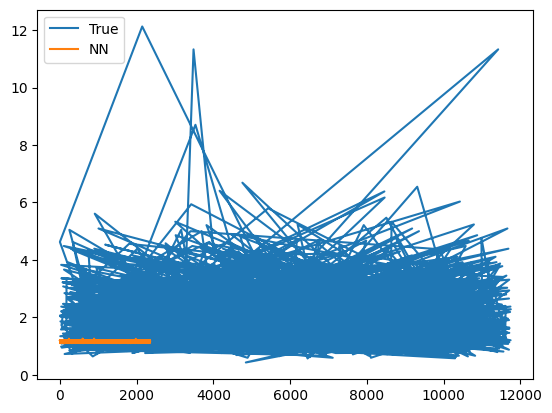

r2_score -->  -0.6257536815177811
MAE -->  0.8765305744470195


In [37]:
#加载已保存的模型
model.load_weights('module.h5',by_name=False)

#预测并评估结果
pred=model.predict(val_x)
plt.plot(val_y,label='True')
plt.plot(pred,label='NN')
plt.legend()
plt.show() 
score=r2_score(val_y,pred)
error=mean_absolute_error(val_y,pred)
print("r2_score --> ", score)
print("MAE --> ", error)

In [38]:
pred

array([[1.2054377],
       [1.2069509],
       [1.2025695],
       ...,
       [1.2057742],
       [1.2010067],
       [1.1784432]], dtype=float32)

In [39]:
X_public_val = new_public_data[features]
X_private_val = new_private_data[features]
#X_private_val = private_dataset[features]
#y_val = public_dataset[target]

# 進行預測
predictions_public = model.predict(X_public_val)
predictions_private = model.predict(X_private_val)
#predictions_private = model.predict(X_private_val)


184/184 [==============================] - 0s 518us/step


In [ ]:
FinalSubmission_public = pd.DataFrame()
FinalSubmission_private = pd.DataFrame()

FinalSubmission_public['ID'] = public_dataset['ID']
FinalSubmission_public['predicted_price'] = predictions_public
FinalSubmission_public['predicted_price'] = FinalSubmission_public['predicted_price'].astype(float)

FinalSubmission_private['ID'] = private_dataset['ID']
FinalSubmission_private['predicted_price'] = predictions_private
FinalSubmission_private['predicted_price'] = FinalSubmission_private['predicted_price'].astype(float)

FinalSubmission_public = pd.concat([FinalSubmission_public, FinalSubmission_private])
FinalSubmission_public.to_csv('./concat_submission_RF.csv', index= False)